In [2]:
import numpy as np

from _graphtools import *
from _vectools import * 

from scipy.linalg import expm
from scipy.sparse.linalg import expm_multiply

In [ ]:
X = [2]*2
AFB = 2*np.pi/X[0]

tree =generate_good_tree(X)
fig, axes = plt.subplots(1, 1, figsize=(5, 5))  # adjust figsize as needed
pl_graph(axes, tree,positions=tree_coords(X,xd=1,yd=1),vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)
plt.show()

In [ ]:
rand = generate_random_cycle_graph(tree)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [ ]:
ftree = fluxedTree(X)
ftree.construct_fluxed()

In [ ]:
rand = generate_random_cycle_graph(ftree)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [ ]:
rand.construct_fluxed()
rand.construct_adj()

In [ ]:
bare_hamiltonian = rand.adj
fluxed_hamiltonian = rand.weighted_adj(AFB)

In [ ]:
def evolve(H, psi0, t):
    U = expm(-1j * H * t)  # time evolution operator U(t)
    psi_t = U @ psi0# time evolution operator U(t)
    return psi_t

In [ ]:
N = len(rand.node_map)
psi_i = e_n(0, N)

end = e_n(N-1,N)

In [ ]:
N

In [ ]:
t = np.linspace(0,1000,100)
prob_flux = []
prob_bare = []
for time in t:
    prob_flux.append(abs(end @ evolve(fluxed_hamiltonian, psi_i,time))**2 )
    prob_bare.append(abs(end @ evolve(bare_hamiltonian, psi_i,time))**2 )

In [ ]:
plt.plot(t, prob_bare,label=r"$\Phi = 0$")
plt.plot(t, prob_flux,label=r"$\Phi = \pi$")

plt.legend(fontsize=15)


In [ ]:
gt = graph_from_fluxed(cascade(X))
gt.construct_fluxed()
gt.construct_adj()

In [ ]:
bare_hamiltonian = gt.adj
fluxed_hamiltonian = gt.weighted_adj(AFB)

In [ ]:
N = len(gt.node_map)
psi_i = e_n(0, N)

end = e_n(N-1,N)

In [ ]:
t = np.linspace(0,10,100)
prob_flux = []
prob_bare = []
for time in t:
    prob_flux.append(abs(end @ evolve(fluxed_hamiltonian, psi_i,time))**2 )
    prob_bare.append(abs(end @ evolve(bare_hamiltonian, psi_i,time))**2 )

In [ ]:
plt.plot(t, prob_bare,label=r"$\Phi = 0$")
plt.plot(t, prob_flux,label=r"$\Phi = \pi$")

plt.legend(fontsize=15)


In [1]:
from _counttools import G, num_rand_cycle,enumerate_necklaces, enumerate_necklaces_tqdm
import numpy as np

from _graphtools import *
from _vectools import * 

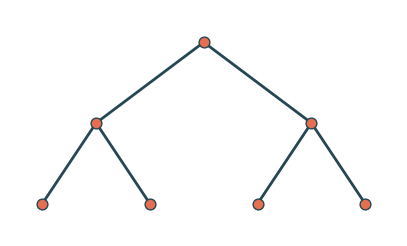

In [2]:
X = [2]*2
AFB = 2*np.pi/X[0]

tree =generate_good_tree(X)
fig, axes = plt.subplots(1, 1, figsize=(5, 5))  # adjust figsize as needed
pl_graph(axes, tree,positions=tree_coords(X,xd=1,yd=1),vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)
plt.show()

In [3]:

neck_seed = list(enumerate_necklaces(int(np.prod(X))))[0]

In [4]:
X=[2]*3
num_rand_cycle(int(np.prod(X)))

101606400.0

In [5]:
%%time

enumerate_necklaces_tqdm(int(np.prod(X)))

 33%|███▎      | 66384190/203212800 [30:14<22:37, 100770.44it/s] 

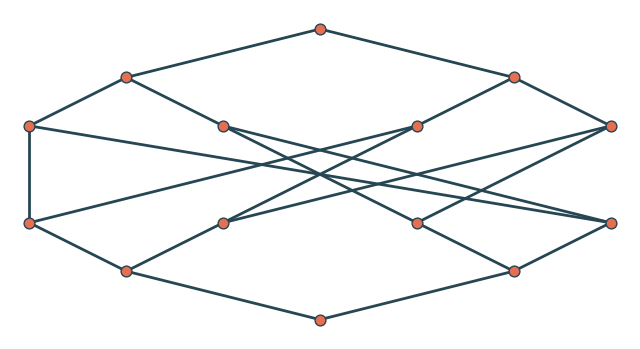

In [5]:
rand = generate_random_cycle_graph(tree,neck_seed)
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=60,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [6]:
np.prod(X)

4

In [88]:
import numpy as np
import math
from scipy.linalg import expm
from _graphtools import *
from _vectools import *
from _counttools import *
from tqdm import tqdm  # import tqdm for progress bars

def evolve(H, psi0, t):
    U = expm(-1j * H * t)  # time evolution operator U(t)
    psi_t = U @ psi0
    return psi_t

def U_evo(eigvals, eigvecs, t):
    phase_factors = np.exp(-1j * eigvals * t)
    return eigvecs @ (phase_factors * (eigvecs.conj().T))

def roundup(x):
    return math.ceil(x / 10.0) * 10

p = 2
n_max = 2
AFB = 2 * np.pi / p

# Loop over different system sizes (or iterations)
for i in range(2, n_max+1):
    #generate the unfluxed tree2
    X = [p] * i
    ftree = fluxedTree(X)
    ftree.construct_fluxed()

    rand = generate_random_cycle_graph(ftree)
    rand.construct_adj()
    bare_hamiltonian = rand.adj
    bare_eigvals, bare_eigvecs = np.linalg.eigh(bare_hamiltonian)

    N = len(rand.node_map)
    psi_i = e_n(0, N)
    end = e_n(N - 1, N)

    # Define the time array over which evolution is evaluated
    num_time=5   
    num_flux=5
    t = np.linspace(0, 2*i*p, num_time)
    fluxes = np.linspace(2*np.pi/(num_flux),2*np.pi, num_flux-1)
    delta_t = t[1]
    U_bare = expm(-1j * bare_hamiltonian * delta_t)

    prob_bare = [0]
    psi_curr_bare = psi_i

    # Use tqdm to show progress for each time step
    for time in t[1:]:
        psi_curr_bare = U_bare@psi_curr_bare
        prob_bare.append(np.abs(end.conj() @ psi_curr_bare)**2)

    #now generate the averaged fluxed random cycle graph
    necklace_seeds = list(enumerate_necklaces(int(np.prod(X))))
    prob_flux_dict={0:prob_bare}

    for seed in tqdm(necklace_seeds, desc=f"Iteration{i}: Sweeping Necklace", unit="Necklace"):
        #generate seed
        rand = generate_random_cycle_graph(ftree,seed)
        rand.construct_fluxed()

        #loop over possible fluxes
        for flux in fluxes:
            #create Hamiltonian for this 
            fluxed_hamiltonian = rand.weighted_adj(flux) 
            fluxed_eigvals, fluxed_eigvecs = np.linalg.eigh(fluxed_hamiltonian)   
            U_fluxed = expm(-1j * fluxed_hamiltonian * delta_t)
        

            prob_flux_curr = [0]
            psi_curr_fluxed = psi_i
    
            for time in t[1:]:
                psi_curr_fluxed = U_fluxed@psi_curr_fluxed
                prob_flux_curr.append(np.abs(end.conj() @ psi_curr_fluxed)**2)
            
            if flux in prob_flux_dict:
                prob_flux_dict[flux].append(prob_flux_curr)
            else:
                prob_flux_dict[flux] =  [prob_flux_curr]

    #average the time-series in the prob_flux_dict in order to get the average evolution over all necklaces
    for key, value in prob_flux_dict.items():
        prob_flux_dict[key] = [sum(group) / len(group) for group in zip(*value)]    
    
    # Save the time and probability arrays to a file for later plotting
    #filename = f"walkresults/{p}avg_rc_{i}.npz"
    #np.savez(filename, t=t, prob_flux_dict=prob_flux_dict, prob_bare=prob_bare, fluxed_adj = rand.fluxed)
    #print(f"Results for iteration {i} saved to {filename}")


Iteration2: Sweeping Necklace: 100%|██████████| 72/72 [00:00<00:00, 354.08Necklace/s]


In [89]:
prob_flux_dict.keys()

dict_keys([0, 1.2566370614359172, 2.9321531433504733, 4.607669225265029, 6.283185307179586])

In [90]:
prob_flux_dict[1.2566370614359172][0]

[0,
 0.1018077242403608,
 0.028043872882740486,
 0.03878014642772026,
 0.005710739555662142]

In [91]:
a = prob_flux_dict[1.2566370614359172]


In [95]:
elementwise_average = [sum(group) / len(group) for group in zip(*a)]


In [96]:
elementwise_average

[0.0,
 0.0722814768958017,
 0.09596801655035218,
 0.059204419253273896,
 0.06249117718978167]